# Life Expectancy and Local School Spending in England, UK
## Problem Statement
In this project, we look to at **average life expectancy** at birth across regions in England between 2016 and 2018 and compare this to **local authority spending on schools** in England by region between 2017 and 2018. From these datasets we want to see if there is a positive correlation between average life expectancy and public spending in England.

The data for average life expectancy was found from the dataset [Health state life expectancy at birth and at age 65 years by local areas](https://www.ons.gov.uk/peoplepopulationandcommunity/healthandsocialcare/healthandlifeexpectancies/datasets/healthstatelifeexpectancyatbirthandatage65bylocalareasuk), UK Office for National Statistics (ONS), released on the 11th December 2019

The data for local authority spending was found from the dataset [LA and school expenditure: 2017 to 2018 financial year](https://www.gov.uk/government/statistics/la-and-school-expenditure-2017-to-2018-financial-year) which looks at how schools and local authorities spent their funding on education, children's services and social care in the financial year 2017 to 2018.

## Data Cleaning of Life Expectancy Data
First we'll import the male and female life expectancy data with the aim of merging the datasets to find the average life expectancy at birth of male and females

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Set the display of max no of rows
pd.set_option('display.max_rows', 500)

# Import male life expectancy data and set county name to index column
male_df = pd.read_excel('male-life-expectancy-regional-uk.xlsx', header=2, usecols=['Area Names', 'Unnamed: 2', 'Unnamed: 3', 'LE'])
female_df = pd.read_excel('female-life-expectancy-regional-uk.xlsx', header=2, usecols=['Area Names', 'Unnamed: 2', 'Unnamed: 3', 'LE'])

# Rename Columns
male_df = male_df.rename(columns={'Area Names': 'Region', 'Unnamed: 2': 'County', 'Unnamed: 3': 'City/Town', 'LE': 'Male LE'})
female_df = female_df.rename(columns={'Area Names': 'Region', 'Unnamed: 2': 'County', 'Unnamed: 3': 'City/Town', 'LE': 'Female LE'})

# If NaN in LE column, drop that row
male_df = male_df[male_df['Male LE'].notnull()]
female_df = female_df[female_df['Female LE'].notnull()]

# Map 'City/Town' or 'County into new column 'Area', (merge the columns)
male_df['Area'] = male_df['County'].fillna(male_df['City/Town'])
male_df = male_df.drop(['County', 'City/Town'], axis=1)

female_df['Area'] = female_df['County'].fillna(female_df['City/Town'])
female_df = female_df.drop(['County', 'City/Town'], axis=1)

# Forward fill region and drop NaN values, drop WALES, SCOTLAND and NORTHERN IRELAND Regions
# set index to Area and reorder columns
male_df['Region'] = male_df['Region'].fillna(method='ffill')
male_df = male_df.loc[7:408].dropna().set_index('Area')
male_df = male_df[['Male LE', 'Region']]

female_df['Region'] = female_df['Region'].fillna(method='ffill')
female_df = female_df.loc[7:408].dropna().set_index('Area')
female_df = female_df[['Female LE']]

# Merge the two data frames into a new one with both life expectancies
life_df = female_df.join(male_df)
life_df['Avg LE'] = life_df[['Female LE', 'Male LE']].mean(axis=1)
life_df = life_df[['Avg LE', 'Region']]
life_df.head()

,Avg LE,Region
Area,,
County Durham,79.850045,NORTH EAST
Darlington,80.552710,NORTH EAST
Hartlepool,79.073210,NORTH EAST
Middlesbrough,77.648625,NORTH EAST
Northumberland,81.054320,NORTH EAST


## Data Cleaning of Local Authority Spending Data
Here we import the local authority spending data and clean it

In [59]:
# Import the local authority spending data 2017-2018
spend = pd.read_excel('school-expenditure-local-authority-17-18.xlsx', header=3, usecols=[1,4], index_col=0)
spend.columns = [['Spend per pupil, £']]
spend = spend.dropna()
spend.head()

,"Spend per pupil, £"
ENGLAND,5138.0
NORTH EAST,5029.0
Darlington,6476.0
Durham,5021.0
Gateshead,4714.0


In [60]:
# Merge the two datasets keeping only data with exact matches
data = life_df.merge(spend, left_index=True, right_index=True, how='inner')
data.columns = [['Average Life Expectancy (years)', 'Region', 'Average spend per pupil (£)']]
data.head()

,Average Life Expectancy (years),Region,Average spend per pupil (£)
Darlington,80.552710,NORTH EAST,6476.0
Gateshead,79.446595,NORTH EAST,4714.0
Hartlepool,79.073210,NORTH EAST,5094.0
Middlesbrough,77.648625,NORTH EAST,5385.0
Newcastle upon Tyne,79.795745,NORTH EAST,5457.0


## Plotting a scatter graph using Seaborn

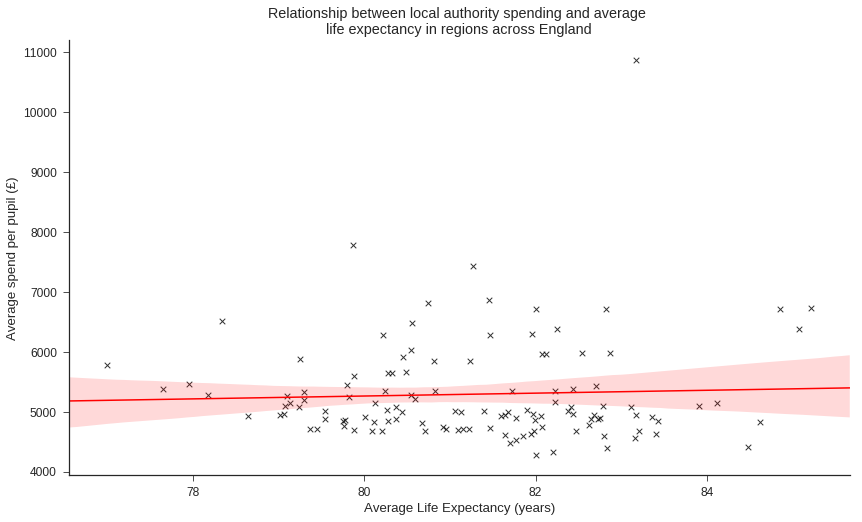

In [62]:
# Plot scatter plot with regression line using Seaborn
import matplotlib.style as style
plt.figure(figsize=(14,8))
plt.title('Relationship between local authority spending and average \nlife expectancy in regions across England')

sns.set_context('paper', font_scale=1.5, rc={'lines.linewidth': 1})
sns.set_style('ticks')
style.use('seaborn-muted')
sns.regplot(x=data['Average Life Expectancy (years)'], y=data['Average spend per pupil (£)'], 
            scatter_kws={'color': 'black'}, line_kws={'color': 'red'}, marker='x')
sns.despine()

## Conclusions
From the graph and regression line we can see there is no strong positive correlation. This means that we must accept the null hypothesis that average spending per pupil does not increase average life expectancy.